In [1]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download muthuj7/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset
License(s): CC0-1.0
  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 912MB/s]


In [3]:
import zipfile

zip=zipfile.ZipFile('/content/weather-dataset.zip','r')
zip.extractall()
zip.close()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten,Conv2D,MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split as t

In [5]:
data=pd.read_csv('/content/weatherHistory.csv')

In [6]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
data.shape

(96453, 12)

In [8]:
data.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [10]:
data['Precip Type'].value_counts()

,count
Precip Type,
rain,85224
snow,10712


In [11]:
data['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


In [12]:
data['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


In [13]:
data=data.dropna()

In [14]:
data.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [15]:
data.shape

(95936, 12)

In [16]:
x=data.drop(columns={'Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'})

In [17]:
y=data['Summary']

In [18]:
l=MinMaxScaler()

In [19]:
lb=LabelEncoder()

In [38]:
# Fit the LabelEncoder on the original 'Summary' column
lb.fit(y)

# Transform the 'Summary' column using the fitted LabelEncoder
y_encoded = lb.transform(y)

In [40]:
def create_sequences(X, y, seq_len=24):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

# Use the scaled features (x_) and the label-encoded target (y_) to create sequences
X_seq, y_seq = create_sequences(x_, y_, 24)

In [27]:
x_train,x_test,y_train,y_test=t(X_seq,y_seq,test_size=0.2,random_state=42)

In [28]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    LSTM(32, return_sequences=False), # Explicitly set return_sequences to False
    Dense(27, activation='softmax') # 27 is the number of unique 'Summary' classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 22, 64)         │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 27)             │           891 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715 (57.48 KB)

 Trainable params: 14,715 (57.48 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

e=EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    verbose=1,
    mode='max',
    restore_best_weights=True
)
m=ModelCheckpoint(
    filepath='weatherPrediction.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)
l=ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=3,
    verbose=1,
    mode='max'
)

In [30]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[e,m,l])

Epoch 1/100
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3997 - loss: 1.5143
Epoch 1: val_accuracy improved from -inf to 0.46338, saving model to weatherPrediction.keras
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.3997 - loss: 1.5142 - val_accuracy: 0.4634 - val_loss: 1.2557 - learning_rate: 0.0010
Epoch 2/100
2392/2398 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4626 - loss: 1.2404
Epoch 2: val_accuracy improved from 0.46338 to 0.47917, saving model to weatherPrediction.keras
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4626 - loss: 1.2403 - val_accuracy: 0.4792 - val_loss: 1.2163 - learning_rate: 0.0010
Epoch 3/100
2393/2398 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4786 - loss: 1.2091
Epoch 3: val_accuracy improved from 0.47917 to 0.48371, saving model to weatherPrediction.keras
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4786 - loss: 1.2091 - val_accuracy: 0.4837 - val_loss: 1.2040 - learning_rate: 0.0010
Epoch 4/100
2395

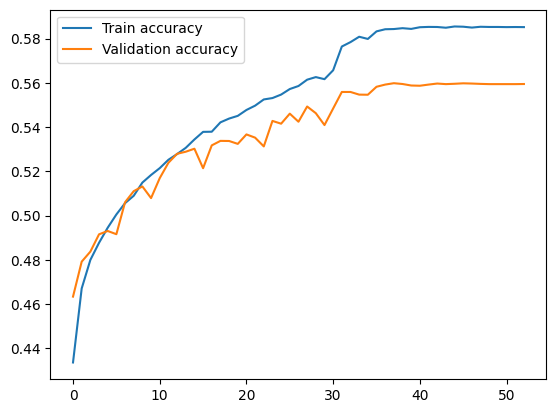

In [31]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()

In [32]:
model.save('weatherPrediction.keras')

In [36]:
# Use the inverse_transform method of the label encoder to get the original label for the number 19
original_summary = lb.inverse_transform([19])

print(f"The number 19 in the 'Summary' column corresponds to: {original_summary[0]}")

The number 19 in the 'Summary' column corresponds to: 19


In [52]:
# Take the last sequence from the preprocessed data as an example input
example_input_sequence = X_seq[-1]

# The model expects a batch of inputs, so we need to add an extra dimension
example_input_sequence = np.expand_dims(example_input_sequence, axis=0)

# Make a prediction
prediction = model.predict(example_input_sequence)

# The prediction is a probability distribution over the classes.
# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Inverse transform the predicted class index to get the original weather summary string
predicted_weather_summary = lb.inverse_transform([predicted_class_index])

print(f"Example Input Shape: {example_input_sequence.shape}")
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Weather Summary: {predicted_weather_summary[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Example Input Shape: (1, 24, 7)
Predicted Class Index: 19
Predicted Weather Summary: 19


In [53]:
print("Total unique classes:", len(lb.classes_))
print("Classes:", lb.classes_)
print("Prediction shape:", prediction.shape)
print("Predicted index:", predicted_class_index)
print("Decoded label:", lb.inverse_transform([predicted_class_index]))


Total unique classes: 27
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Prediction shape: (1, 27)
Predicted index: 19
Decoded label: [19]


In [54]:
y = data['Summary'].values
lb = LabelEncoder()
y = lb.fit_transform(y)


In [55]:
y = lb.fit_transform(data['Summary'])
lb.fit(y)  # ❌ this overwrites the mapping


LabelEncoder()

In [56]:
print("Encoder classes:", lb.classes_)


Encoder classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [57]:
from sklearn.preprocessing import LabelEncoder

# Encode only once, before splitting
lb = LabelEncoder()
y = lb.fit_transform(data['Summary'])  # summary strings here

# later, when predicting
predicted_class_index = np.argmax(prediction)
decoded_label = lb.inverse_transform([predicted_class_index])
print(decoded_label[0])


Partly Cloudy


In [46]:
# Use the inverse_transform method of the label encoder to get the original label for the number 19
original_summary = lb.inverse_transform([19])

print(f"The number 19 in the 'Summary' column corresponds to: {original_summary[0]}")

The number 19 in the 'Summary' column corresponds to: 19
